In [1]:
import warnings; warnings.filterwarnings("ignore")

In [2]:
from IPython import display as disp
import librosa
# import librosa.display
import soundfile as sf
import os

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  

In [4]:
DATA_PATH = '/Users/timur/Downloads/audio_dataset'

In [5]:
df = pd.read_csv(f'{DATA_PATH}/df.csv') 

In [6]:
df.head(3)

text  \
0  По его словам, на вчерашний вечер у Донбанка «...   
1  Этот процесс так захватывает человека, что он ...   
2  Это крупнейшее левое движение Западного полуша...   

                               audio_id                         worker_id  \
0  2e5fc762-6b7c-4168-8dfd-44e90e908de3  bd83ddb2596e455951c3838ed9061b84   
1  93b47a6a-504c-41e8-b420-1ed5b8360d0d  bd83ddb2596e455951c3838ed9061b84   
2  19588ca3-9249-43cd-bc55-374432dffdbd  bd83ddb2596e455951c3838ed9061b84   

     status  version   pool_id                               task_id  \
0  APPROVED        1  12233816  0000baac58--5e813e8b44e47001255de14a   
1  APPROVED        1  12233816  0000baac58--5e813e8b44e47001255de14a   
2  APPROVED        1  12233816  0000baac58--5e813e8b44e47001255de14a   

                                                path  duration    frames  \
0  audio_files/2e5fc762-6b7c-4168-8dfd-44e90e908d...     13.02  208320.0   
1  audio_files/93b47a6a-504c-41e8-b420-1ed5b8360d...     15.02  240320.0   
2  audio_files/19588ca3-9249-43cd-bc55-374432dffd...     15.48  247680.0   

      rate  
0  16000.0  
1  16000.0  
2  16000.0

In [7]:
sample = df.sample()

In [8]:
path = f"{DATA_PATH}/{sample['path'].item()}"

In [9]:
disp.display(disp.Audio(path))
print(sample['text'].item())

Как они проявляются, и самое главное, что их доля в поддержке небесного вмешательства.


In [19]:
wav, sr = librosa.load(path)

In [20]:
wav.shape

(218295,)

In [12]:
def plot_waveform(wav: np.ndarray, sr: int, label: str = None, figsize=(20, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    if label:
        fig.suptitle(label, fontsize=16)
    return librosa.display.waveshow(wav, sr=sr, ax=ax)

In [13]:
def plot_mel(wav: np.ndarray, sr: int, label: str = None, figsize=(20, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    if label:
        fig.suptitle(label, fontsize=16)
    S = librosa.feature.melspectrogram(y=wav, sr=sr)
    return librosa.display.specshow(librosa.power_to_db(S, ref=np.max), ax=ax)

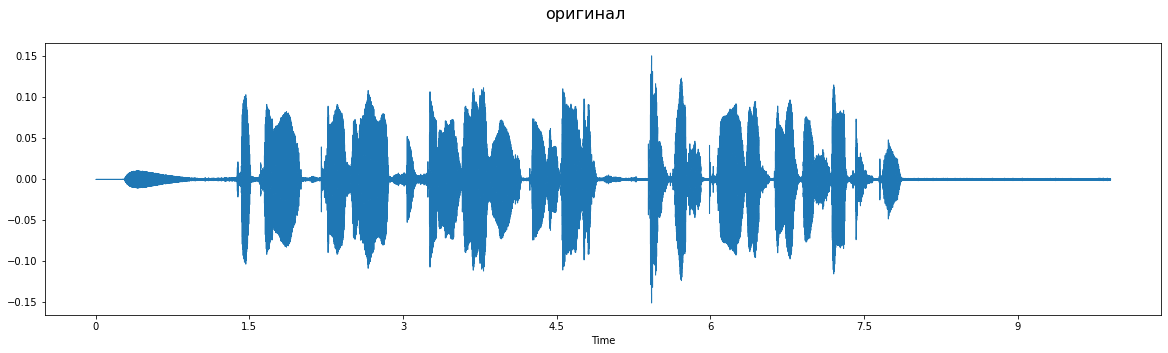

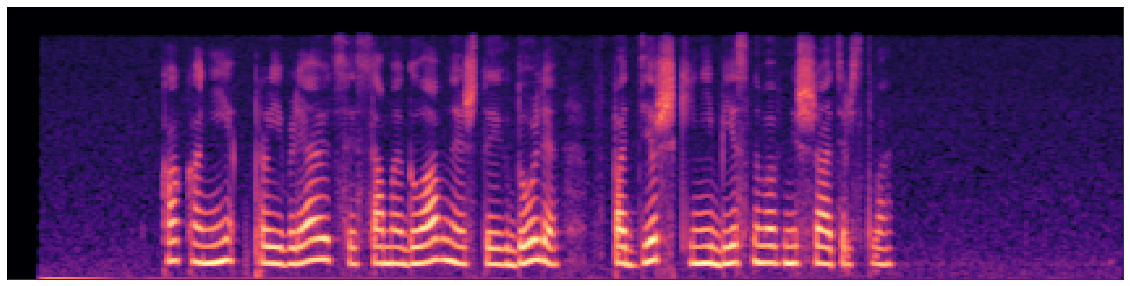

In [14]:
plot_waveform(wav, sr, 'оригинал')
plot_mel(wav, sr)

In [15]:
def add_white_noise(signal, noise_percentage_factor=0.2):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

In [16]:
noised_wav = add_white_noise(wav)
noised_audio_path = 'noised.wav'
sf.write(noised_audio_path, noised_wav, sr)
disp.display(disp.Audio(noised_audio_path))

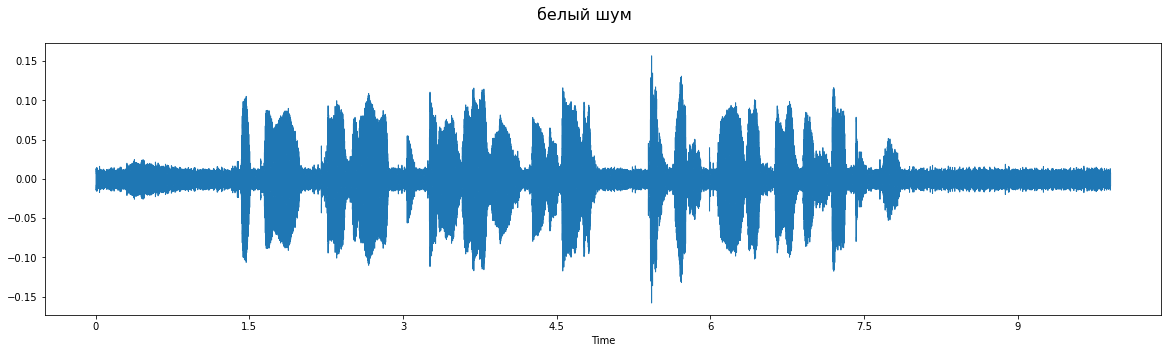

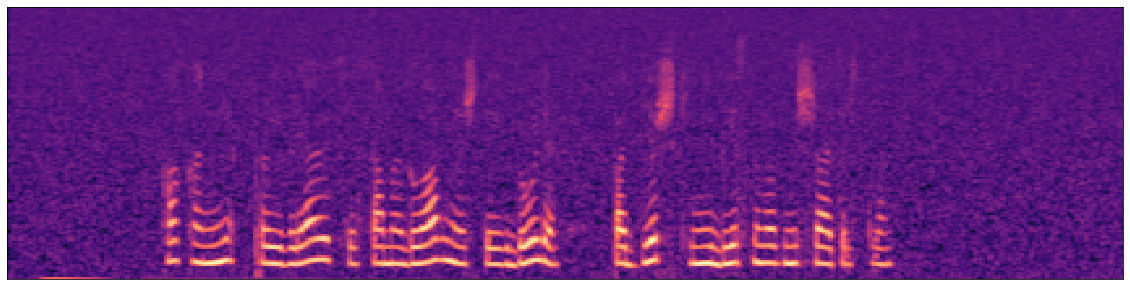

In [17]:
plot_waveform(noised_wav, sr, 'белый шум')
plot_mel(noised_wav, sr)

In [18]:
sounds_path='../sounds/'

In [21]:
from audiomentations import AddBackgroundNoise, PolarityInversion

add_backgroud_noise = AddBackgroundNoise(
    sounds_path=sounds_path,
    min_snr_in_db=3.0,
    max_snr_in_db=30.0,
    noise_transform=PolarityInversion(),
    p=1.0
)

In [22]:
auged_wav = add_backgroud_noise(wav, sr)

In [23]:
auged_audio_path = 'auged.wav'
sf.write(auged_audio_path, auged_wav, sr)
disp.display(disp.Audio(auged_audio_path))

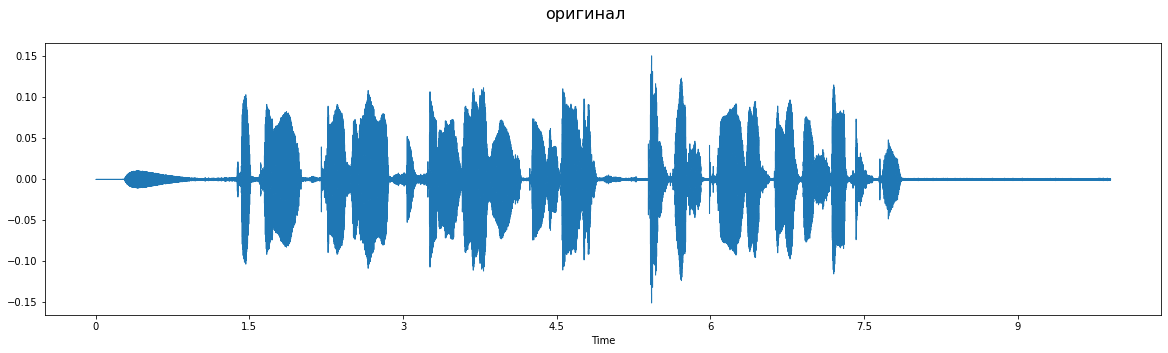

scratch.wav


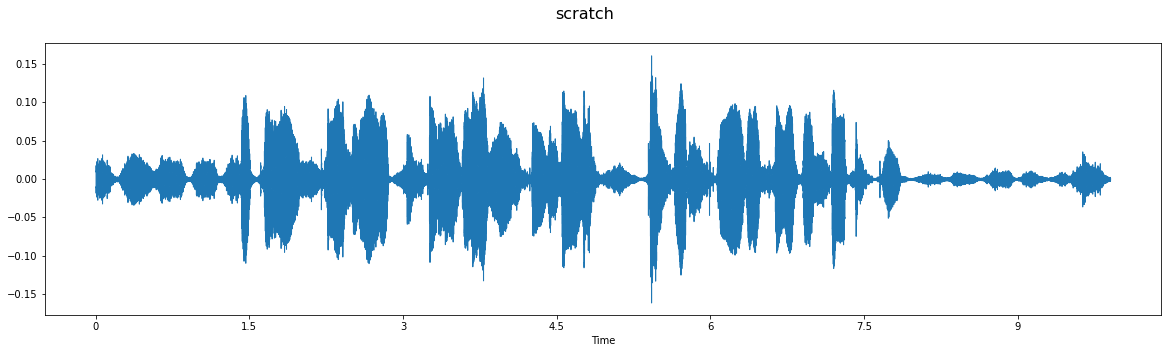

clothes.wav


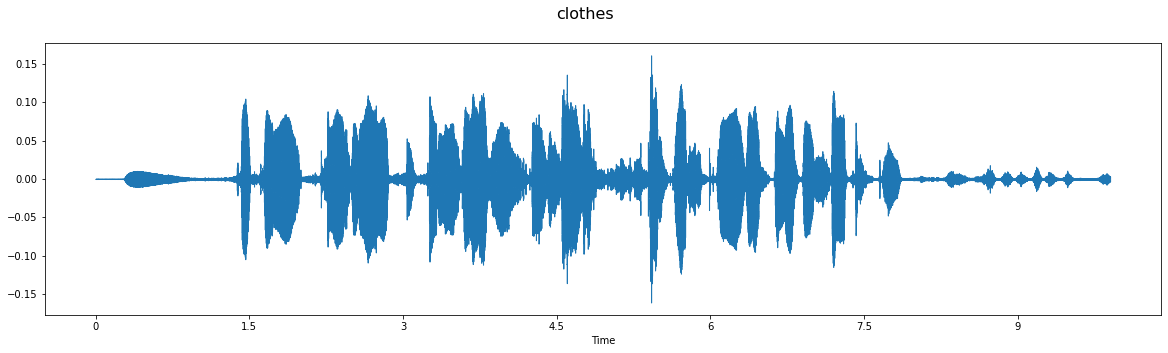

pen_rolling.wav


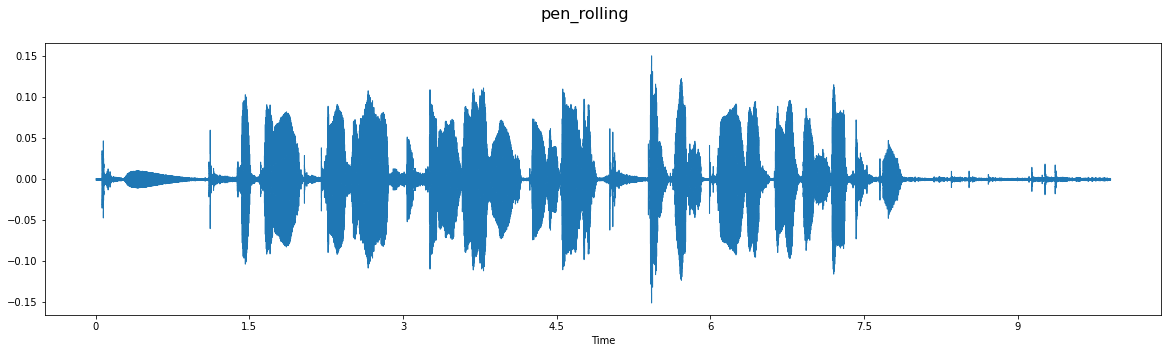

beat.wav


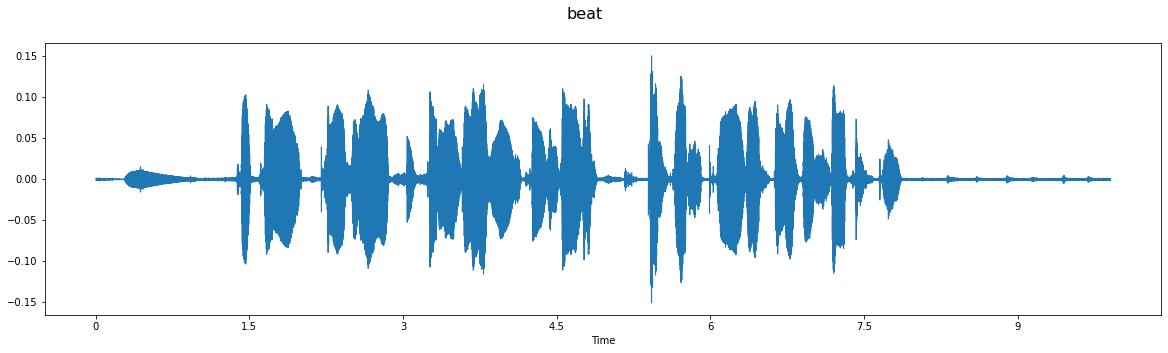

cough.wav


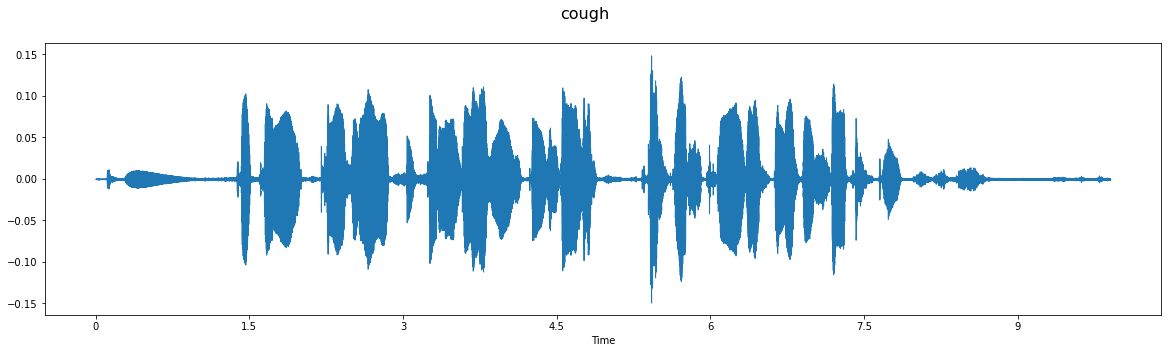

claps.wav


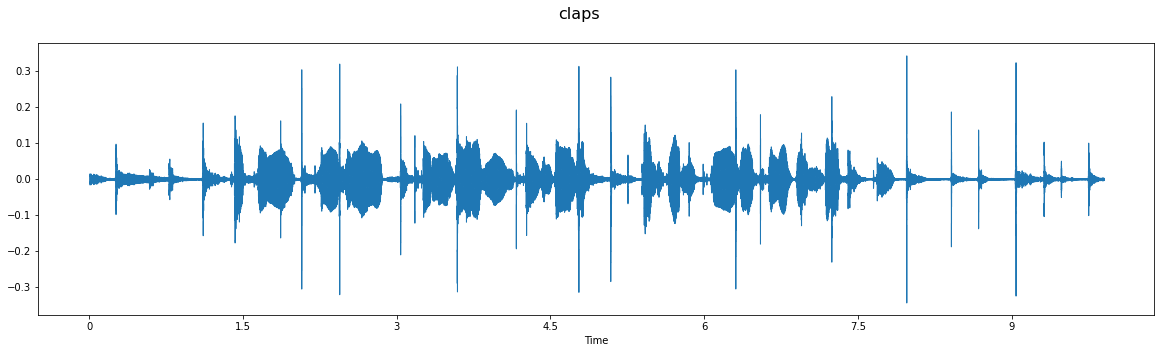

In [30]:
sound_names = os.listdir(sounds_path)
plot_waveform(wav, sr, label='оригинал')
disp.display(disp.Audio(path))
plt.show()
for sound_name in sound_names:
    aug_func = AddBackgroundNoise(
        sounds_path=f"{sounds_path}/{sound_name}",
        min_snr_in_db=3.0,
        max_snr_in_db=30.0,
        noise_transform=PolarityInversion(),
        p=1.0
    )
    auged_wav = aug_func(wav, sr)
    auged_audio_path = f'auged_{sound_name}'
    sf.write(auged_audio_path, auged_wav, sr)
    print(sound_name)
    disp.display(disp.Audio(auged_audio_path))
    plot_waveform(auged_wav, sr, sound_name.split('.')[0])
    plt.show()

In [31]:
%%timeit
wav, sr = librosa.load(path)
auged_wav = add_backgroud_noise(wav, sr)
sf.write('a.wav', auged_wav, sr)

567 ms ± 138 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
(567 * len(df)) / 1000 / 60 / 60

18.584999999999997

In [40]:
df = df.sample(1000)

In [42]:
(567 * len(df)) / 1000 / 60 / 60

0.1575

In [48]:
format(999, "04d")

'0999'

In [70]:
from audiomentations import Compose, AddGaussianNoise, AddBackgroundNoise, PolarityInversion

aug_pipeline = Compose([
    AddGaussianNoise(
        min_amplitude=0.005,
        max_amplitude=0.015,
        p=0.5
    ),
    AddBackgroundNoise(
        sounds_path=f"{sounds_path}",
        min_snr_in_db=3.0,
        max_snr_in_db=50.0,
        noise_transform=PolarityInversion(),
        p=1.0,
    )
])

In [71]:
SAVE_DIR = '../dataset'
clean_prefix = 'clean'
noisy_prefix = 'noisy'

In [72]:
from tqdm import tqdm
format_i = f"0{int(np.ceil(np.log10(len(df)))) + 1}d"

for i, fname in tqdm(enumerate(df.path.values), total=len(df)):
    path = f'{DATA_PATH}/{fname}'
    
    wav, sr = librosa.load(path)
    
    new_path_clean = f'{SAVE_DIR}/{clean_prefix}/{format(i, format_i)}.wav'
    new_path_noisy = f'{SAVE_DIR}/{noisy_prefix}/{format(i, format_i)}.wav'
    
    auged_wav = aug_pipeline(wav, sr)
    sf.write(new_path_clean, wav, sr)
    sf.write(new_path_noisy, auged_wav, sr)

100%|██████████████████████████████████████████████████████████| 1000/1000 [06:39<00:00,  2.51it/s]


In [73]:
sr

22050